<a href="https://colab.research.google.com/github/isaac-debug/Data-Science/blob/main/house_price_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Download data

In [68]:
# Download data which we get in "house price crawler"
!gdown --id 1--9m1aKr8eCH_hdVYHe3kaK4TZghJxMA
!gdown --id 12oikSuSUdBVOLx_qX3MxGhxsj1bIo1Zh

# Download data from 政府公開資料平台
!gdown --id 1fJKkuWSp8O_Wbjp_C2QRCNK5Q-4JXLZG

data109 = pd.read_csv('housePriceData_10601to10912.csv')
data110 = pd.read_csv('housePriceData_10601to11010.csv')
data109 = data109.drop(columns=['Unnamed: 0'])
data110 = data110.drop(columns=['Unnamed: 0'])

Downloading...
From: https://drive.google.com/uc?id=1--9m1aKr8eCH_hdVYHe3kaK4TZghJxMA
To: /content/housePriceData_10601to10912.csv
100% 107M/107M [00:00<00:00, 207MB/s] 
Downloading...
From: https://drive.google.com/uc?id=12oikSuSUdBVOLx_qX3MxGhxsj1bIo1Zh
To: /content/housePriceData_10601to11010.csv
100% 97.2M/97.2M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fJKkuWSp8O_Wbjp_C2QRCNK5Q-4JXLZG
To: /content/covid19_tw_specimen.csv
100% 23.2k/23.2k [00:00<00:00, 19.7MB/s]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
data110

,DistrictType,Adress,HouseType,BasePercent,city,time,elevator,floor,age,ground,building,park,lat,lon,management,pricePerP,r,area,totalPrice,district,type,unit,v,year,cementIndex,RebarIndex,rediscountRate,loanRate,monthDepositRate,yearDepositRate,standardRate,overnightRate,commercialPaperRate,bondRate,TWtotalWagePermonth,TWRegularPerMonth,TWrealWage,TWrealRegularWage
0,其他,福華路１２８巷１２號二樓,公寓(5樓含以下無電梯),85.50%,A,11010,無,二層/五層,43.0,2,1,0,25.102871,121.523218,無,"670,093",11,28.65,"1,920",A15,Biz,2,3房2廳1衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
1,其他,德行東路６之２號六樓,華廈(10層含以下有電梯),71.35%,A,11010,有,六層/七層,38.0,2,1,0,25.106384,121.525394,有,"266,410",34,34.53,920,A15,Biz,2,3房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
2,其他,至誠路一段１３６巷１７號二樓,住宅大樓(11層含以上有電梯),39.26%,A,11010,有,二層/十四層,3.0,2,1,2,25.102117,121.534527,有,"997,792",58,114.80,"9,430",A15,Biz,2,1房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
3,其他,文林路６６１巷１５號,華廈(10層含以下有電梯),31.80%,A,11010,有,一層/五層,29.0,1,1,0,25.100430,121.521641,無,"439,464",17,106.22,"4,668",A15,Biz,2,0房4廳4衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
4,其他,中山北路六段４２３號五樓,華廈(10層含以下有電梯),73.52%,A,11010,有,五層/七層,40.0,2,1,0,25.113791,121.526804,無,"634,592",31,45.70,"2,900",A15,Biz,2,4房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313975,工業區,中興一巷７１號,透天厝,NaN,G,10601,無,全/三層,NaN,1,1,0,24.633568,121.825784,無,"132,588",9,48.27,640,G09,Biz,2,4房2廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313976,鄉村區,福德東路２９巷２１號,透天厝,NaN,G,10601,無,全/四層,21.0,1,1,0,24.641240,121.832699,無,"62,747",62,53.87,338,G09,Biz,2,5房2廳4衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313977,住,永愛路１５０巷２１號,透天厝,NaN,G,10601,無,全/二層,44.0,1,1,0,24.619057,121.837608,無,"75,626",9,23.8,180,G09,Biz,2,3房2廳1衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313978,住,中山路一段２７６號,透天厝,NaN,G,10601,無,全/二層,34.0,3,2,0,24.596900,121.849330,無,"90,701",16,62.4,566,G09,Biz,2,5房4廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524


## Data Preprocessing

### Change time to datetime and price to float

In [69]:
data110['time'] = data110['time'] + 191100
data110['time'] = pd.to_datetime(data110['time'], format='%Y%m')
data110['pricePerP'] = data110['pricePerP'].replace('[,]', '', regex=True).astype(float)

data110

,DistrictType,Adress,HouseType,BasePercent,city,time,elevator,floor,age,ground,building,park,lat,lon,management,pricePerP,r,area,totalPrice,district,type,unit,v,year,cementIndex,RebarIndex,rediscountRate,loanRate,monthDepositRate,yearDepositRate,standardRate,overnightRate,commercialPaperRate,bondRate,TWtotalWagePermonth,TWRegularPerMonth,TWrealWage,TWrealRegularWage
0,其他,福華路１２８巷１２號二樓,公寓(5樓含以下無電梯),85.50%,A,2021-10-01,無,二層/五層,43.0,2,1,0,25.102871,121.523218,無,670093.0,11,28.65,"1,920",A15,Biz,2,3房2廳1衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
1,其他,德行東路６之２號六樓,華廈(10層含以下有電梯),71.35%,A,2021-10-01,有,六層/七層,38.0,2,1,0,25.106384,121.525394,有,266410.0,34,34.53,920,A15,Biz,2,3房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
2,其他,至誠路一段１３６巷１７號二樓,住宅大樓(11層含以上有電梯),39.26%,A,2021-10-01,有,二層/十四層,3.0,2,1,2,25.102117,121.534527,有,997792.0,58,114.80,"9,430",A15,Biz,2,1房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
3,其他,文林路６６１巷１５號,華廈(10層含以下有電梯),31.80%,A,2021-10-01,有,一層/五層,29.0,1,1,0,25.100430,121.521641,無,439464.0,17,106.22,"4,668",A15,Biz,2,0房4廳4衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
4,其他,中山北路六段４２３號五樓,華廈(10層含以下有電梯),73.52%,A,2021-10-01,有,五層/七層,40.0,2,1,0,25.113791,121.526804,無,634592.0,31,45.70,"2,900",A15,Biz,2,4房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313975,工業區,中興一巷７１號,透天厝,NaN,G,2017-01-01,無,全/三層,NaN,1,1,0,24.633568,121.825784,無,132588.0,9,48.27,640,G09,Biz,2,4房2廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313976,鄉村區,福德東路２９巷２１號,透天厝,NaN,G,2017-01-01,無,全/四層,21.0,1,1,0,24.641240,121.832699,無,62747.0,62,53.87,338,G09,Biz,2,5房2廳4衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313977,住,永愛路１５０巷２１號,透天厝,NaN,G,2017-01-01,無,全/二層,44.0,1,1,0,24.619057,121.837608,無,75626.0,9,23.8,180,G09,Biz,2,3房2廳1衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313978,住,中山路一段２７６號,透天厝,NaN,G,2017-01-01,無,全/二層,34.0,3,2,0,24.596900,121.849330,無,90701.0,16,62.4,566,G09,Biz,2,5房4廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524


### Change house type data into English

In [77]:
data110['HouseType'] = data110['HouseType'].astype('category')
data110['HouseType'] = data110['HouseType'].cat.rename_categories({'倉庫':'Storage', '住宅大樓(11層含以上有電梯)': 'Penthouse', '公寓(5樓含以下無電梯)': 'Apartment(<5 no el)', '其他': 'others', '套房(1房(1廳)1衛)': 'studio', '工廠': 'factory', '店面（店舖)': 'store', '廠辦': 'factory store', '華廈(10層含以下有電梯)': 'Apartment(<10)', '辦公商業大樓': 'commercial building', '農舍': 'farmhouse', '透天厝': 'house'})
data110

,DistrictType,Adress,HouseType,BasePercent,city,time,elevator,floor,age,ground,building,park,lat,lon,management,pricePerP,r,area,totalPrice,district,type,unit,v,year,cementIndex,RebarIndex,rediscountRate,loanRate,monthDepositRate,yearDepositRate,standardRate,overnightRate,commercialPaperRate,bondRate,TWtotalWagePermonth,TWRegularPerMonth,TWrealWage,TWrealRegularWage
0,其他,福華路１２８巷１２號二樓,Apartment(<5 no el),85.50%,A,2021-10-01,無,二層/五層,43.0,2,1,0,25.102871,121.523218,無,670093.0,11,28.65,"1,920",A15,Biz,2,3房2廳1衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
1,其他,德行東路６之２號六樓,Apartment(<10),71.35%,A,2021-10-01,有,六層/七層,38.0,2,1,0,25.106384,121.525394,有,266410.0,34,34.53,920,A15,Biz,2,3房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
2,其他,至誠路一段１３６巷１７號二樓,Penthouse,39.26%,A,2021-10-01,有,二層/十四層,3.0,2,1,2,25.102117,121.534527,有,997792.0,58,114.80,"9,430",A15,Biz,2,1房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
3,其他,文林路６６１巷１５號,Apartment(<10),31.80%,A,2021-10-01,有,一層/五層,29.0,1,1,0,25.100430,121.521641,無,439464.0,17,106.22,"4,668",A15,Biz,2,0房4廳4衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
4,其他,中山北路六段４２３號五樓,Apartment(<10),73.52%,A,2021-10-01,有,五層/七層,40.0,2,1,0,25.113791,121.526804,無,634592.0,31,45.70,"2,900",A15,Biz,2,4房2廳2衛,110,148.08,105.51,1.125,1.50,0.35,0.77,2.442,0.083,0.30,0.50,50042,43593,47496,41375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313975,工業區,中興一巷７１號,house,NaN,G,2017-01-01,無,全/三層,NaN,1,1,0,24.633568,121.825784,無,132588.0,9,48.27,640,G09,Biz,2,4房2廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313976,鄉村區,福德東路２９巷２１號,house,NaN,G,2017-01-01,無,全/四層,21.0,1,1,0,24.641240,121.832699,無,62747.0,62,53.87,338,G09,Biz,2,5房2廳4衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313977,住,永愛路１５０巷２１號,house,NaN,G,2017-01-01,無,全/二層,44.0,1,1,0,24.619057,121.837608,無,75626.0,9,23.8,180,G09,Biz,2,3房2廳1衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524
313978,住,中山路一段２７６號,house,NaN,G,2017-01-01,無,全/二層,34.0,3,2,0,24.596900,121.849330,無,90701.0,16,62.4,566,G09,Biz,2,5房4廳3衛,106,94.99,99.72,1.375,1.75,0.60,1.04,2.631,0.173,0.47,1.14,93971,39650,93671,39524


In [78]:
# # save 
# data110.to_csv('houseData.csv')

In [79]:
# # save to google drive
# from google.colab import drive
# drive.mount('drive')
# !cp houseData.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


### Counting mean value of each month

In [103]:
data_cityType = data110[['city', 'pricePerP', 'time']]

data_groupByCityTime = data_cityType.groupby(['city', 'time']).mean()
data_groupByCityTime

pricePerP
city time                     
A    2017-01-01  620470.101464
     2017-02-01  609304.049356
     2017-03-01  638818.220190
     2017-04-01  611736.652141
     2017-05-01  632019.068252
...                        ...
G    2021-06-01  231108.708502
     2021-07-01  192028.073733
     2021-08-01  218950.652582
     2021-09-01  198643.246411
     2021-10-01  201248.382845

[174 rows x 1 columns]

## scatter plot

city
A    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
G    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

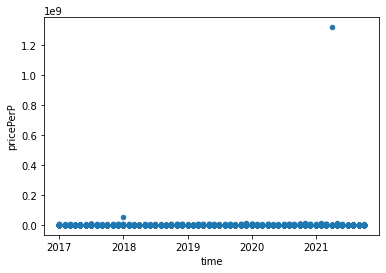

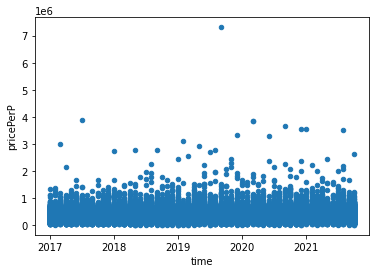

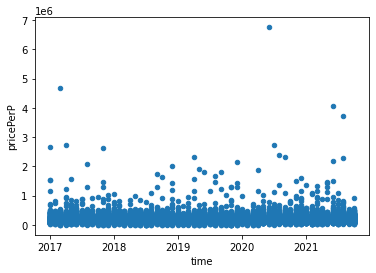

In [99]:
# # after 2020
# data_city2019 = data_cityType[data_cityType['time'] >= '2021-02-01']
# data_city2019 = data_city2019.groupby(['city', 'time']).mean()

# run directly
data110.groupby('city').plot(kind='scatter',x='time',y='pricePerP')


## line plot

city
A    AxesSubplot(0.125,0.2;0.775x0.68)
F    AxesSubplot(0.125,0.2;0.775x0.68)
G    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

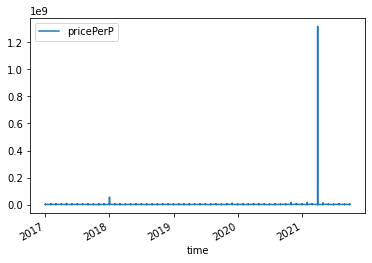

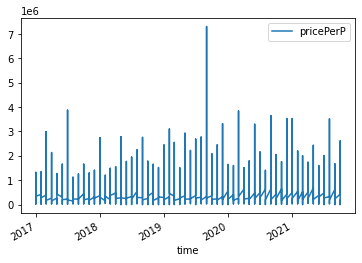

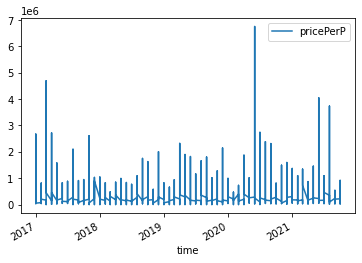

In [106]:
data110.groupby('city').plot(kind='line',x='time',y='pricePerP')


## Combine with 台灣疫情資料庫

In [18]:
covidDf = pd.read_csv('covid19_tw_specimen.csv')
covidDf = covidDf[['通報日', 'Total']]
covidDf

,通報日,Total
0,2020/1/15,0.0
1,2020/1/16,4.0
2,2020/1/17,0.0
3,2020/1/18,1.0
4,2020/1/19,1.0
...,...,...
708,2021/12/23,14088.0
709,2021/12/24,15375.0
710,2021/12/25,7206.0
711,2021/12/26,0.0


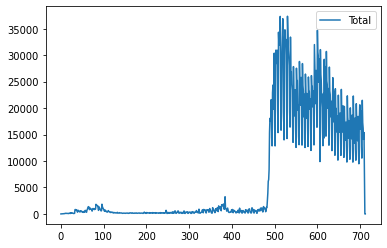

In [20]:
covidDf['Total'].plot(legend=True)

受到篩檢量能引響許多，而無法反映疫情實際狀況，故不採用

## 觀察台北市各區變化

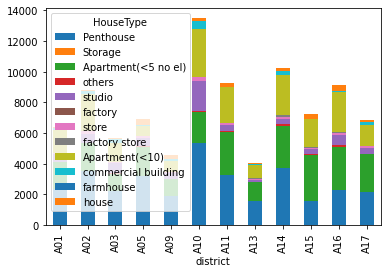

In [110]:
taipei = data110[data110['city'] == 'A']
taipei.groupby(['district','HouseType']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [115]:
taipei[taipei['district']=='A10'].head(5)

,DistrictType,Adress,HouseType,BasePercent,city,time,elevator,floor,age,ground,building,park,lat,lon,management,pricePerP,r,area,totalPrice,district,type,unit,v,year,cementIndex,RebarIndex,rediscountRate,loanRate,monthDepositRate,yearDepositRate,standardRate,overnightRate,commercialPaperRate,bondRate,TWtotalWagePermonth,TWRegularPerMonth,TWrealWage,TWrealRegularWage
143,其他,林森北路１０７巷１２號五樓,Apartment(<10),84.40%,A,2021-10-01,有,五層/七層,45.0,1,1,0,25.050048,121.525520,有,549696.0,16,47.30,"2,600",A10,Biz,2,4房2廳3衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
144,其他,農安街１２５巷２３號三樓,Apartment(<5 no el),85.67%,A,2021-10-01,無,三層/四層,52.0,1,1,0,25.065624,121.529988,無,593716.0,10,21.56,"1,280",A10,Biz,2,3房2廳2衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
145,其他,中山北路三段２７號六樓,Penthouse,79.21%,A,2021-10-01,有,六層/十四層,44.0,2,1,0,25.065244,121.522661,有,612324.0,48,18.14,"1,111",A10,Biz,2,NaN,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
146,其他,南京東路一段１３巷６弄６號七樓,Apartment(<10),54.59%,A,2021-10-01,有,七層/七層,29.0,1,1,0,25.053477,121.523563,有,599712.0,18,48.86,"2,930",A10,Biz,2,2房1廳2衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
147,其他,民權東路二段９２巷８弄２１號二樓,Apartment(<5 no el),100.00%,A,2021-10-01,無,二層/四層,50.0,1,1,0,25.060908,121.530869,無,577154.0,13,33.09,"1,910",A10,Biz,2,3房2廳3衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375


看來在中正區累積房價較高

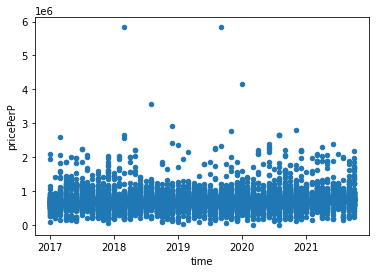

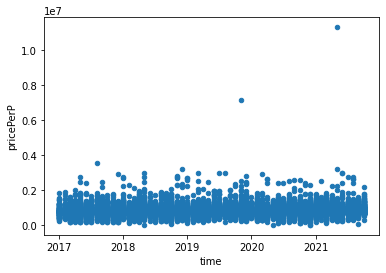

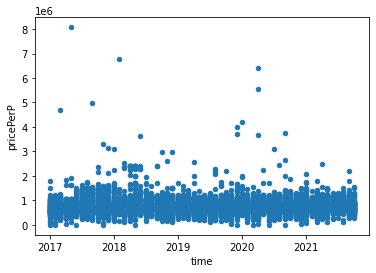

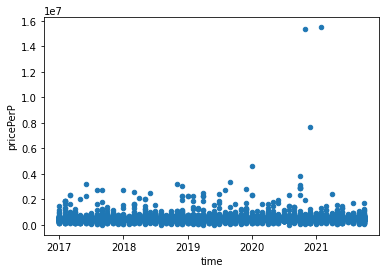

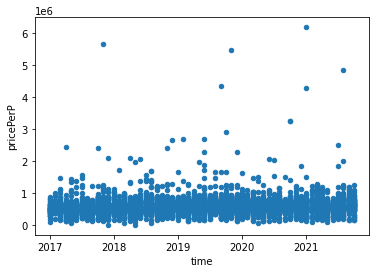

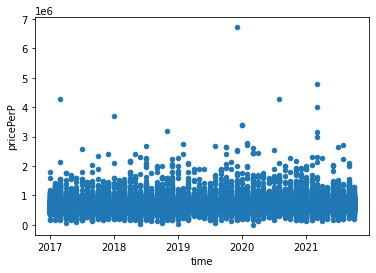

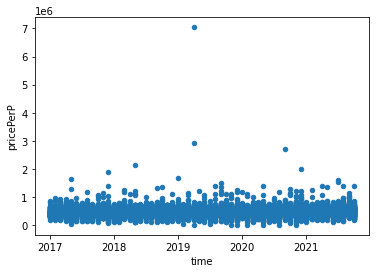

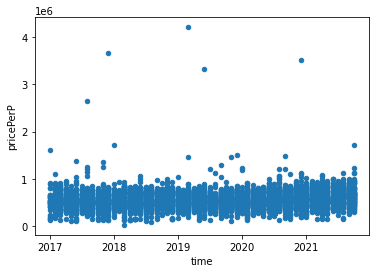

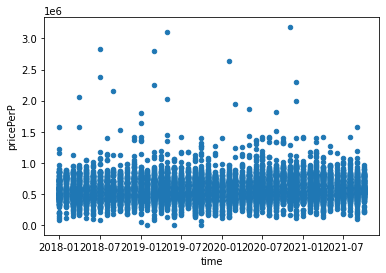

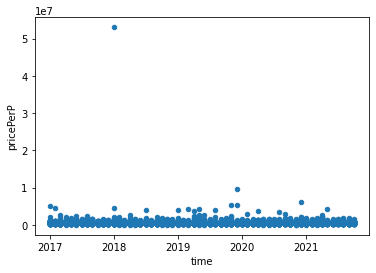

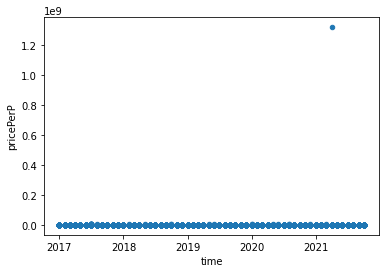

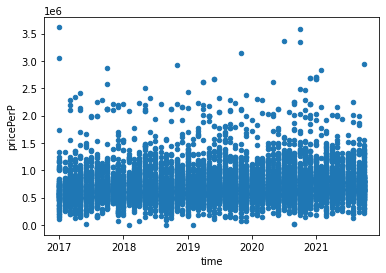

In [113]:
taipei.groupby('district').plot(kind='scatter',x='time',y='pricePerP')
plt.show()

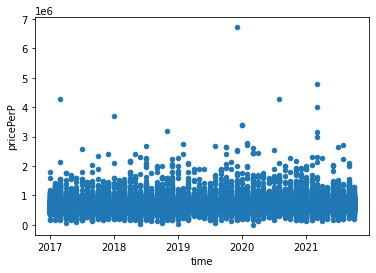

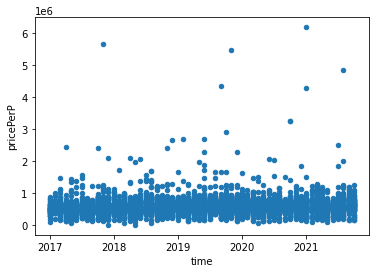

In [120]:
taipeiA10 = data110[data110['district'] == 'A10']
taipeiA10.plot(kind='scatter',x='time',y='pricePerP')

taipeiA09 = data110[data110['district'] == 'A09']
taipeiA09.plot(kind='scatter',x='time',y='pricePerP')
plt.show()

In [121]:
taipei[taipei['district']=='A09'].head(5)

,DistrictType,Adress,HouseType,BasePercent,city,time,elevator,floor,age,ground,building,park,lat,lon,management,pricePerP,r,area,totalPrice,district,type,unit,v,year,cementIndex,RebarIndex,rediscountRate,loanRate,monthDepositRate,yearDepositRate,standardRate,overnightRate,commercialPaperRate,bondRate,TWtotalWagePermonth,TWRegularPerMonth,TWrealWage,TWrealRegularWage
92,其他,南京西路６８號五樓,Penthouse,61.33%,A,2021-10-01,有,五層/十五層,15.0,1,1,0,25.052736,121.518515,有,824988.0,22,12.00,990,A09,Biz,2,NaN,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
93,其他,哈密街５９巷１８弄８之１號,house,NaN,A,2021-10-01,無,全/一層,NaN,1,1,0,25.074405,121.515414,無,765583.0,5,6.53,500,A09,Biz,2,NaN,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
94,其他,華亭街３６號七樓之７,Penthouse,42.88%,A,2021-10-01,有,七層/十一層,11.0,1,1,0,25.053496,121.512988,有,683613.0,19,14.16,968,A09,Biz,2,1房1廳1衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
95,其他,敦煌路８０巷２號十樓之１,Penthouse,56.77%,A,2021-10-01,有,十層/十五層,13.0,2,1,1,25.075491,121.517342,有,720992.0,61,71.62,"4,600",A09,Biz,2,3房2廳2衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375
96,其他,重慶北路三段２９５巷３０號四樓,Apartment(<5 no el),86.53%,A,2021-10-01,無,四層/五層,41.0,1,1,0,25.073504,121.514994,無,159035.0,12,28.30,450,A09,Biz,2,2房2廳1衛,110,148.08,105.51,1.125,1.5,0.35,0.77,2.442,0.083,0.3,0.5,50042,43593,47496,41375


## 觀察新北地區變化

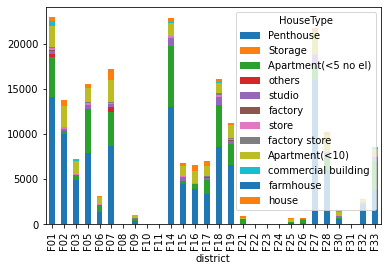

In [123]:
nTaipei = data110[data110['city'] == 'F']
nTaipei.groupby(['district','HouseType']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [124]:
print(nTaipei[nTaipei['district'] == 'F01'].head(3))
print(nTaipei[nTaipei['district'] == 'F14'].head(3))
print(nTaipei[nTaipei['district'] == 'F27'].head(3))

     DistrictType         Adress  ... TWrealWage TWrealRegularWage
4166           其他     福前街２９５號十二樓  ...      47496             41375
4167           其他       新豐街２８號二樓  ...      47496             41375
4168           其他  中和街１５５巷１２號十一樓  ...      47496             41375

[3 rows x 38 columns]
     DistrictType         Adress  ... TWrealWage TWrealRegularWage
3049           其他    信義路１巷２６弄１２號  ...      47496             41375
3050           其他  永豐街５５巷２９弄４號二樓  ...      47496             41375
3051           其他  新海路７２巷５弄１３號五樓  ...      47496             41375

[3 rows x 38 columns]
     DistrictType         Adress  ... TWrealWage TWrealRegularWage
3441           其他   民生路１５４之１號十一樓  ...      47496             41375
3442           其他  八勢路５０巷８弄２８號六樓  ...      47496             41375
3443           其他  民權路１８７巷８號二十六樓  ...      47496             41375

[3 rows x 38 columns]


分別為：中和、板橋和新店

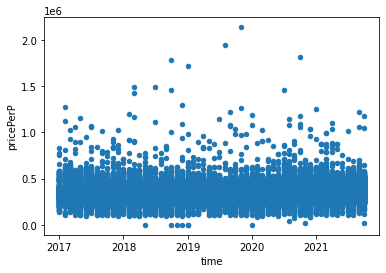

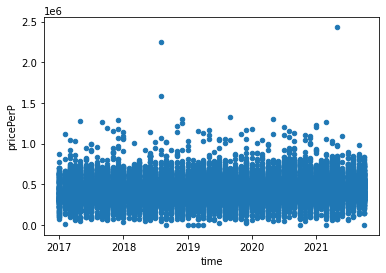

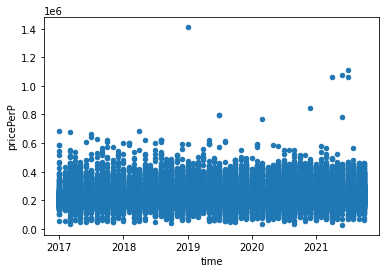

In [125]:
NaipeiF01 = data110[data110['district'] == 'F01']
NaipeiF01.plot(kind='scatter',x='time',y='pricePerP')

NaipeiF14 = data110[data110['district'] == 'F14']
NaipeiF14.plot(kind='scatter',x='time',y='pricePerP')

NaipeiF27 = data110[data110['district'] == 'F27']
NaipeiF27.plot(kind='scatter',x='time',y='pricePerP')

plt.show()

## 觀察宜蘭地區變化

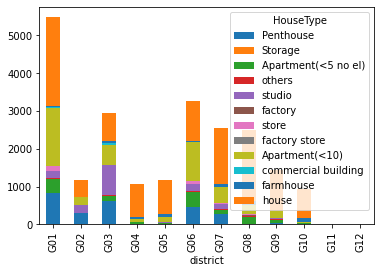

In [129]:
ilan = data110[data110['city'] == 'G']
ilan.groupby(['district','HouseType']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [132]:
print(ilan[ilan['district'] == 'G01'].head(3))
print(ilan[ilan['district'] == 'G06'].head(3))
print(ilan[ilan['district'] == 'G03'].head(3))

     DistrictType          Adress  ... TWrealWage TWrealRegularWage
4847           其他  延平一路２０６巷４７弄３２號  ...      47496             41375
4848           其他    大坡路一段１２１巷３５號  ...      47496             41375
4849           其他        縣政二街１１７號  ...      47496             41375

[3 rows x 38 columns]
     DistrictType         Adress  ... TWrealWage TWrealRegularWage
5075           其他  中山路三段３３６號四樓之７  ...      47496             41375
5076        特定農業區        月眉路６２８號  ...      47496             41375
5077        特定農業區   復興路三段４５６巷８５號  ...      47496             41375

[3 rows x 38 columns]
     DistrictType         Adress  ... TWrealWage TWrealRegularWage
5006           其他   德陽路１１１巷１０號六樓  ...      47496             41375
5007           其他  育龍路２６１巷１號三樓之二  ...      47496             41375
5008           其他        育英路１４９號  ...      47496             41375

[3 rows x 38 columns]


分別為：宜蘭市、羅東和礁溪

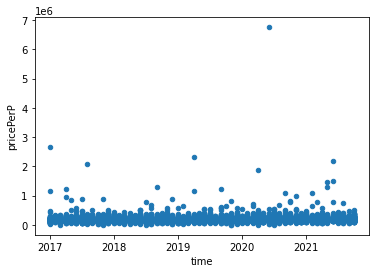

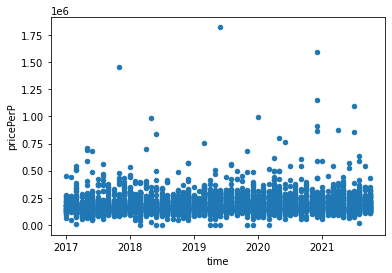

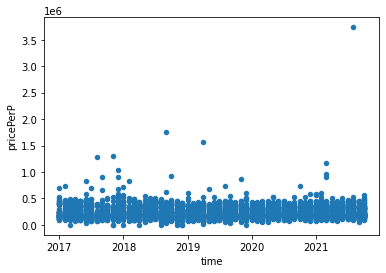

In [133]:
ilanG01 = data110[data110['district'] == 'G01']
ilanG01.plot(kind='scatter',x='time',y='pricePerP')

ilanG06 = data110[data110['district'] == 'G06']
ilanG06.plot(kind='scatter',x='time',y='pricePerP')

ilanG03 = data110[data110['district'] == 'G03']
ilanG03.plot(kind='scatter',x='time',y='pricePerP')

plt.show()